In [64]:
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import my_functions as mf
from scipy.optimize import curve_fit
from scipy.fftpack import fft, ifft, fftfreq
from scipy.special import voigt_profile
from scipy.signal import convolve
import re
importlib.reload(mf)


<module 'my_functions' from '/Users/fergusayton/Documents/My Library/fayt3249/2024/Honours Thesis/sample_coupling_analysis/my_functions.py'>



############Quality Factors############
Fitted Q_tot: 1053.823174766
Fitted Q_ext: 97384817.265962496
Estimated Q_int: 1053.834578549
Fitted alpha: -0.000000000
Fitted x_0: 3.961445708e+00 GHz
Fitted S21_baseline: -1.000000008
R-Squared: 0.9980502894505001
#######################################




############S21 Features##############
Q Total: 1065.345836046
Estimated Resonant Frequency (GHz): 3.961488491
FWHM (GHz): 0.003718500
Baseline (dB): -81.061952412
S21 Peak (dB): -49.642279600
######################################




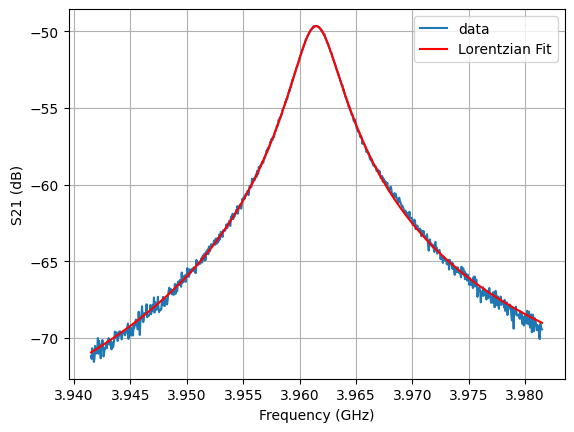

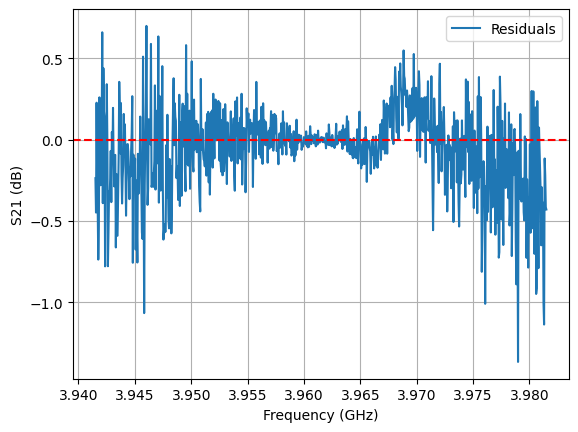

In [59]:
data_file = "data_vna/data_19-12/S21_LGD2_Fridge_Cool_Down_2024-12-19_13-33-39"
# data_file ="data_vna/data_19-12/S21_LGD2_Fridge_Cool_Down_2024-12-19_13-34-26"

label =os.path.basename(data_file)
cwd = os.getcwd()
mypath = os.path.join(cwd, data_file)
data = mf.read_fridge_VNA_data(mypath)
y_data = data['S21 (dB)']
x_data = data['Frequency (GHz)']

## Filters: 

#y_data = lorentzian_smoothing(y_data)
#y_data = mf.low_pass_band_filter_fft(1000, x_data, y_data, plot_check=False)

mask = (x_data >= (3.9615050000000003-0.02)) & (x_data <= (3.9615050000000003+0.02))
x_data = x_data[mask]
y_data = y_data[mask]

q_params, fitted_y = mf.extract_quality_factors(mf.s21_lorentzian_original,x_data, y_data, to_print=True)

s21_features = mf.extract_s21_features(x_data, y_data, to_print=True)

plt.plot(x_data, y_data, label="data")
plt.plot(x_data, fitted_y, color="red", label="Lorentzian Fit")
plt.xlabel("Frequency (GHz)")
plt.ylabel("S21 (dB)")
plt.grid()
plt.legend()
plt.show()

residuals = y_data - fitted_y
plt.plot(x_data, residuals, label="Residuals")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Frequency (GHz)")
plt.ylabel("S21 (dB)")
plt.legend()
plt.grid()
plt.show()


POWER LEVEL =  -10 dBm


############S21 Features##############
Q Total: 1089.097984433
Estimated Resonant Frequency (GHz): 3.920752744
FWHM (GHz): 0.003600000
Baseline (linear): 0.000000012
S21 Peak (linear): 0.000081976
Baseline (dB): -79.280164645
S21 Peak (dB): -40.863131500
######################################




/Users/fergusayton/Documents/My Library/fayt3249/2024/Honours Thesis/sample_coupling_analysis/my_functions.py:13: RuntimeWarning: invalid value encountered in log10
  return 10* np.log10(y_data)




############Quality Factors############
Fitted Q_tot: 1069.908697078
Fitted Q_ext: 13092143.335248243
Estimated Q_int: 1069.996138695
Fitted alpha: -0.000000006
Fitted x_0: 3.920686109e+00 GHz
Fitted S21_baseline: -0.999999975
R-Squared: 0.999687052193256
#######################################




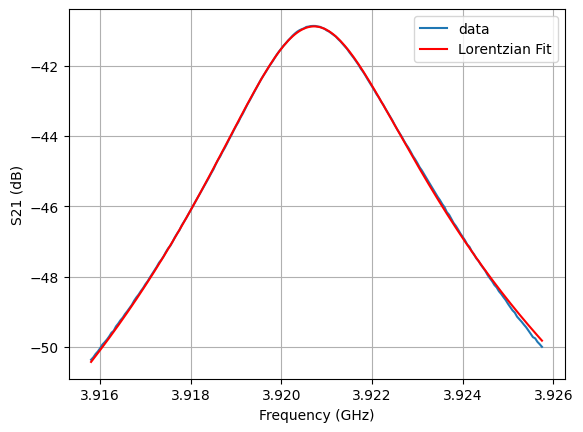

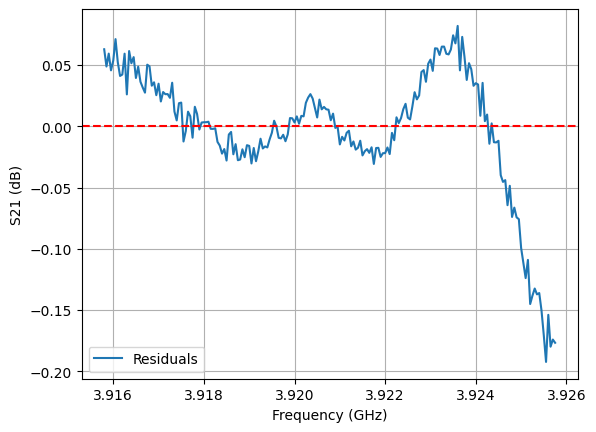

POWER LEVEL =  -15 dBm


############S21 Features##############
Q Total: 1089.098071941
Estimated Resonant Frequency (GHz): 3.920753059
FWHM (GHz): 0.003600000
Baseline (linear): 0.000000004
S21 Peak (linear): 0.000032021
Baseline (dB): -83.515367660
S21 Peak (dB): -44.945715900
######################################




/Users/fergusayton/Documents/My Library/fayt3249/2024/Honours Thesis/sample_coupling_analysis/my_functions.py:13: RuntimeWarning: invalid value encountered in log10
  return 10* np.log10(y_data)




############Quality Factors############
Fitted Q_tot: 1069.053104436
Fitted Q_ext: 33492966.422487207
Estimated Q_int: 1069.087228347
Fitted alpha: -0.000000002
Fitted x_0: 3.920685789e+00 GHz
Fitted S21_baseline: -0.999999980
R-Squared: 0.999675104520145
#######################################




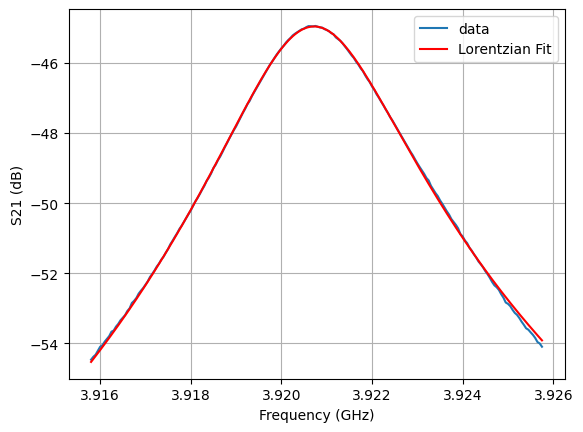

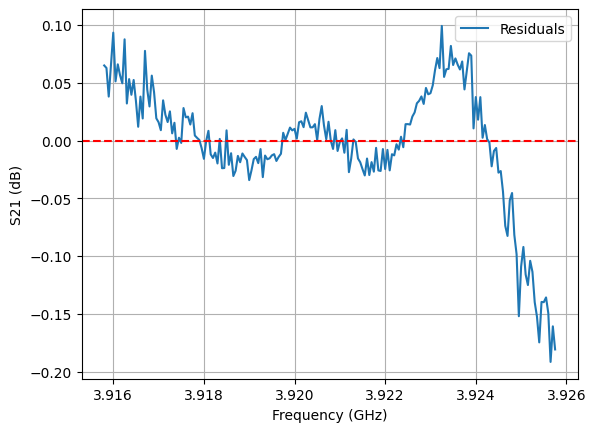

POWER LEVEL =  -20 dBm


############S21 Features##############
Q Total: 1089.098156012
Estimated Resonant Frequency (GHz): 3.920753362
FWHM (GHz): 0.003600000
Baseline (linear): 0.000000000
S21 Peak (linear): 0.000003254
Baseline (dB): -93.786435215
S21 Peak (dB): -54.875283700
######################################




############Quality Factors############
Fitted Q_tot: 1073.219006203
Fitted Q_ext: 332472207.988338113
Estimated Q_int: 1073.222470561
Fitted alpha: -0.000000000
Fitted x_0: 3.920685135e+00 GHz
Fitted S21_baseline: -1.000000005
R-Squared: 0.9995201172891771
#######################################




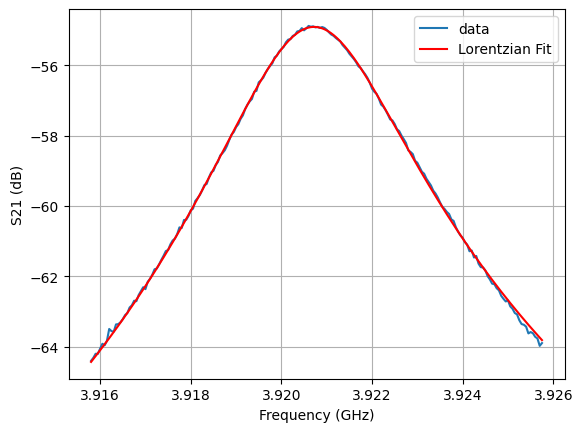

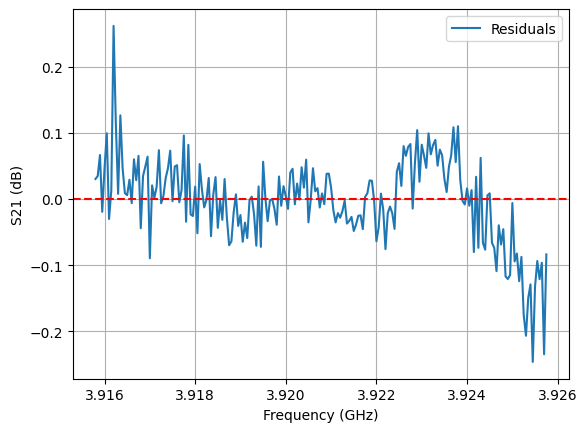

POWER LEVEL =  -30 dBm


############S21 Features##############
Q Total: 1074.179268140
Estimated Resonant Frequency (GHz): 3.920754329
FWHM (GHz): 0.003650000
Baseline (linear): 0.000000000
S21 Peak (linear): 0.000001319
Baseline (dB): -96.222017733
S21 Peak (dB): -58.795974300
######################################




############Quality Factors############
Fitted Q_tot: 1071.208642796
Fitted Q_ext: 819531815.924513936
Estimated Q_int: 1071.210042972
Fitted alpha: -0.000000000
Fitted x_0: 3.920685992e+00 GHz
Fitted S21_baseline: -1.000000001
R-Squared: 0.9992841035866606
#######################################




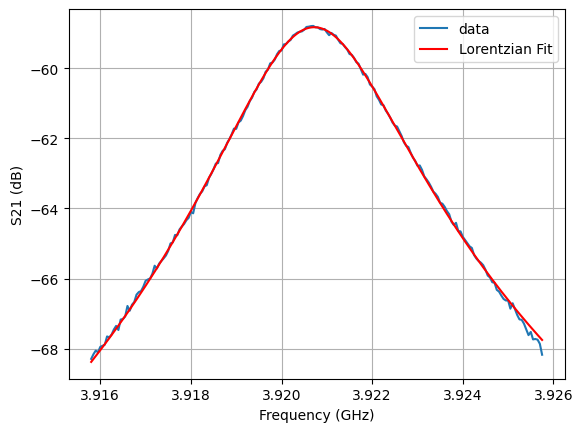

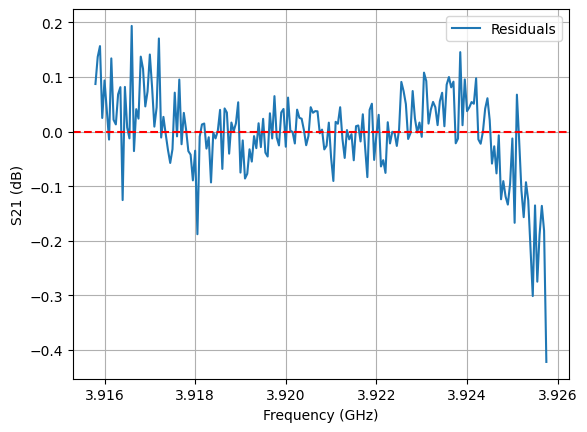

POWER LEVEL =  -35 dBm


############S21 Features##############
Q Total: 1074.178310452
Estimated Resonant Frequency (GHz): 3.920750833
FWHM (GHz): 0.003650000
Baseline (linear): -0.000000000
S21 Peak (linear): 0.000000327
Baseline (dB): nan
S21 Peak (dB): -64.858733500
######################################




/Users/fergusayton/Documents/My Library/fayt3249/2024/Honours Thesis/sample_coupling_analysis/my_functions.py:13: RuntimeWarning: invalid value encountered in log10
  return 10* np.log10(y_data)




############Quality Factors############
Fitted Q_tot: 1065.060652514
Fitted Q_ext: 3270345308.099720955
Estimated Q_int: 1065.060999375
Fitted alpha: -0.000000000
Fitted x_0: 3.920696716e+00 GHz
Fitted S21_baseline: -0.999999999
R-Squared: 0.9981585054120959
#######################################




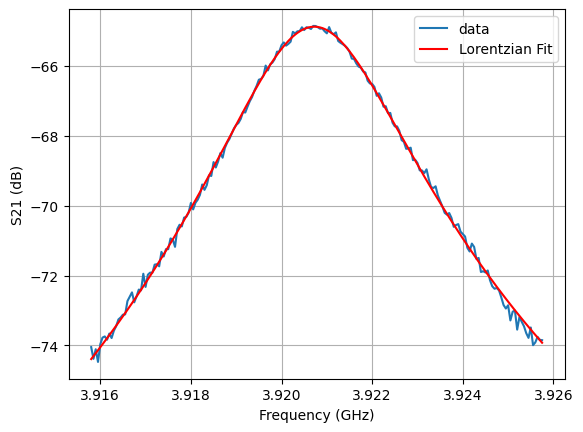

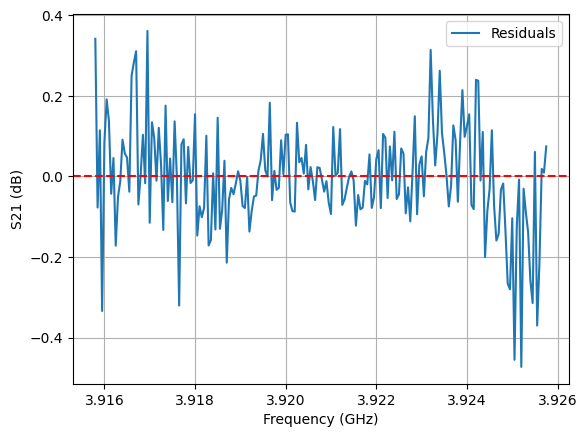

POWER LEVEL =  -40 dBm


############S21 Features##############
Q Total: 1120.212726452
Estimated Resonant Frequency (GHz): 3.920744543
FWHM (GHz): 0.003500000
Baseline (linear): 0.000000000
S21 Peak (linear): 0.000000137
Baseline (dB): -101.455778630
S21 Peak (dB): -68.636427300
######################################




############Quality Factors############
Fitted Q_tot: 1076.318381131
Fitted Q_ext: 8230007095.703737259
Estimated Q_int: 1076.318521891
Fitted alpha: -0.000000000
Fitted x_0: 3.920652407e+00 GHz
Fitted S21_baseline: -1.000000001
R-Squared: 0.9949688303047388
#######################################




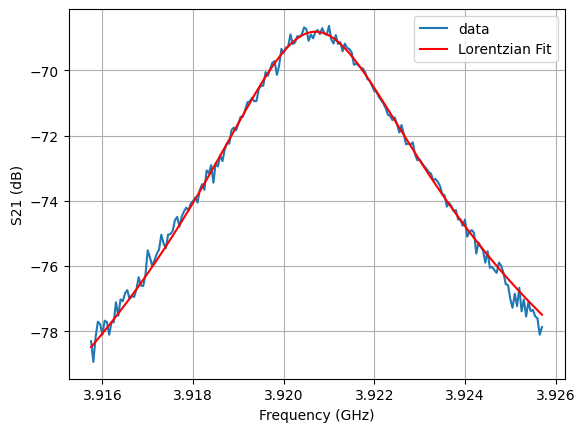

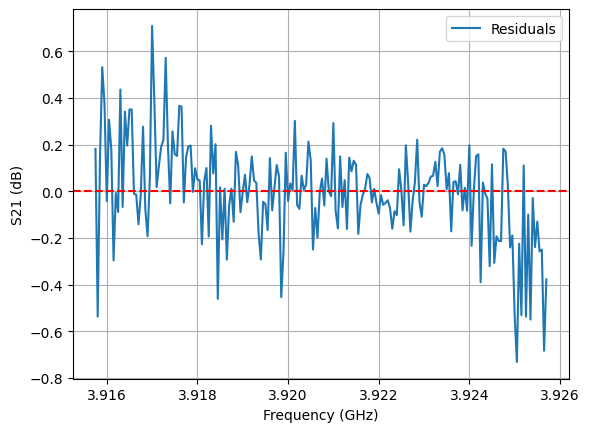

POWER LEVEL =  -45 dBm


############S21 Features##############
Q Total: 1104.436122289
Estimated Resonant Frequency (GHz): 3.920748234
FWHM (GHz): 0.003550000
Baseline (linear): 0.000000000
S21 Peak (linear): 0.000000137
Baseline (dB): -101.582276140
S21 Peak (dB): -68.623122800
######################################




/Users/fergusayton/Documents/My Library/fayt3249/2024/Honours Thesis/sample_coupling_analysis/my_functions.py:13: RuntimeWarning: invalid value encountered in log10
  return 10* np.log10(y_data)
/Users/fergusayton/Documents/My Library/fayt3249/2024/Honours Thesis/sample_coupling_analysis/my_functions.py:373: OptimizeWarning: Covariance of the parameters could not be estimated
  Q_tot_fit, Q_ext_fit, alpha_fit, x_0_fit, S21_baseline_fit = params




############Quality Factors############
Fitted Q_tot: 1068.670030695
Fitted Q_ext: 8152624220.179570198
Estimated Q_int: 1068.670170780
Fitted alpha: 0.000000000
Fitted x_0: 3.920746012e+00 GHz
Fitted S21_baseline: -1.000000000
R-Squared: 0.9941785509911902
#######################################




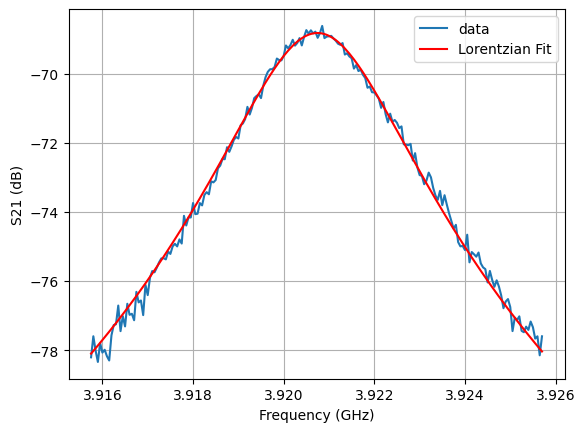

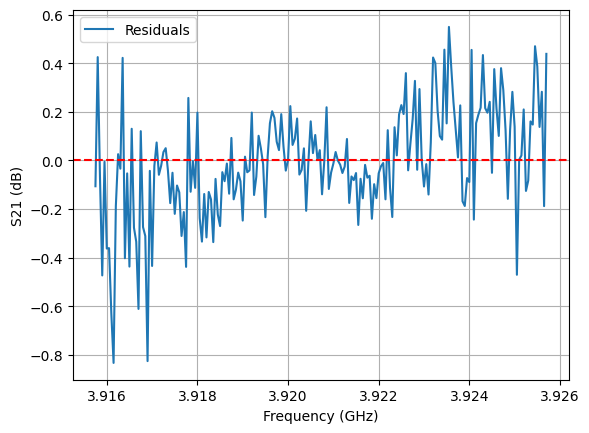

In [65]:
path = "data_vna/data_29_01_25_power_levels/"
data_files =  sorted(glob.glob(path +"*"))
qs_total = []
qs_ext = []
qs_int = [] 
powers = []

for file in data_files:
    data = mf.read_fridge_VNA_data(file)
    y_data = data['S21 (dB)']
    x_data = data['Frequency (GHz)']

    # y_data = mf.low_pass_band_filter_fft(200,x_data,y_data, plot_check=True)
    # y_data = pd.Series(y_data)
    match = re.search(r"([-]?\d+)_dBm", file)
    if match: 
        power_level = int(match.group(1))
    print("POWER LEVEL = ", power_level, "dBm")
    
    s21_features = mf.extract_s21_features(x_data, y_data, to_print=True)
    mask = (x_data >= (s21_features["f_res"]-0.005)) & (x_data <= (s21_features["f_res"]+0.005))
    x_data = x_data[mask]
    y_data = y_data[mask]

    q_params, fitted_y = mf.extract_quality_factors(mf.s21_lorentzian_adjusted,x_data, y_data, to_print=True)
    
    qs_total.append(q_params["Q_tot"])
    qs_ext.append(q_params["Q_ext"])
    qs_int.append(q_params["Q_int"])
    powers.append(power_level)

    plt.plot(x_data, y_data, label="data")
    plt.plot(x_data, fitted_y, color="red", label="Lorentzian Fit")
    plt.xlabel("Frequency (GHz)")
    plt.ylabel("S21 (dB)")
    plt.grid()
    plt.legend()
    plt.show()

    residuals = y_data - fitted_y
    plt.plot(x_data, residuals, label="Residuals")
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Frequency (GHz)")
    plt.ylabel("S21 (dB)")
    plt.legend()
    plt.grid()
    plt.show()



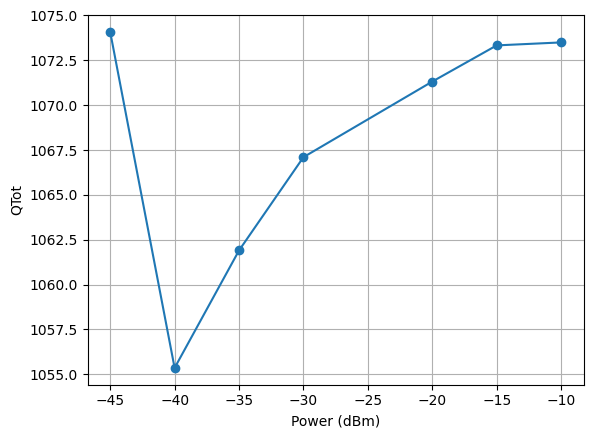

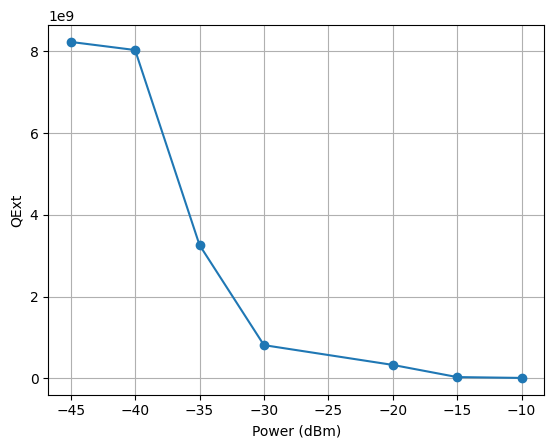

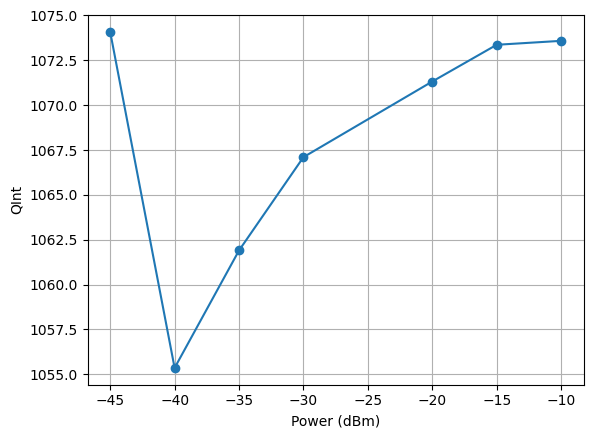

In [61]:
plt.plot(powers, qs_total, marker="o")
plt.xlabel("Power (dBm)")
plt.ylabel("QTot")
plt.grid()
plt.show()    

plt.plot(powers, qs_ext, marker="o")
plt.xlabel("Power (dBm)")
plt.ylabel("QExt")
plt.grid()
plt.show() 

plt.plot(powers, qs_int, marker="o")
plt.xlabel("Power (dBm)")
plt.ylabel("QInt")
plt.grid()
plt.show()   